In this Notebook We generate the figures for figure 3a and 3b b which consider the pearson's R of individual CpGs and OLS regression of various models. We first look at the pearson's R values of Clock CpGs in the Elastic net clock fit to the dataset GSE40279, which was used by Hannum et. al. for their elastic net models (in https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3780611/). This Elastic net was initally trained in the "Remove CpGs" Notebook. We show the accuracy of predictions made on this clock then plot the square of the pearson's R (R^2) vs the rank of absolute weight the clock gives to the CpG and finaly plot the methylation of a low R^2 clock. Then we train "model1" which is a clock trained on an equivelant of GSE40279 which is missing the ~800 clock CpGs from the previous elastic net clock. The previous steps are then repeat with the exeption of the fact that we plot the methylation behavior of a high R^2 clock in model1. We then move on to find R^2 of every CpG in GSE40279.

In [1]:
#import libraries used in this file
import pandas as pd 
import numpy as np 
import os
import sys
sys.path.append('..')

import geo_tools as gt 

import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from joblib import dump, load
from sklearn.preprocessing import StandardScaler
import random

%matplotlib inline

In [2]:
#find the parent directory
import os
import sys
sys.path.append('..')

print(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
parent = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

/Users/connorluellen/Desktop/conboylaboratory/DNAm clocks


In [3]:
#load in the original dataset
hannum_raw = pd.read_pickle(parent + '/MethylAndAges/Hannum raw.pkl')

In [4]:
hannum_raw

,GSM989827,GSM989828,GSM989829,GSM989830,GSM989831,GSM989832,GSM989833,GSM989834,GSM989835,GSM989836,...,GSM990618,GSM990619,GSM990620,GSM990621,GSM990622,GSM990623,GSM990624,GSM990625,GSM990626,GSM990627
ID_REF,,,,,,,,,,,,,,,,,,,,,
cg00000029,0.464197,0.454883,0.485764,0.480785,0.501220,0.499918,0.485852,0.512442,0.518155,0.417986,...,0.560958,0.472081,0.508502,0.505193,0.443411,0.527496,0.588331,0.362994,0.499145,0.458600
cg00000108,0.941091,0.939033,0.918802,0.929908,0.934548,0.950543,0.925855,0.941330,0.938528,0.933814,...,0.934699,0.978612,0.922024,0.963052,0.992631,0.958173,0.982450,0.954392,0.931690,0.974731
cg00000109,0.911182,0.596455,0.870333,0.889689,0.890450,0.898493,0.893972,0.892010,0.900841,0.883539,...,0.881957,0.926289,0.930091,0.946547,0.929131,0.922034,0.855145,0.927184,0.900938,0.829869
cg00000165,0.132014,0.206917,0.162861,0.197780,0.148437,0.224093,0.400489,0.194553,0.134710,0.204569,...,0.199883,0.165116,0.210248,0.177351,0.118742,0.223068,0.162180,0.196430,0.167477,0.170578
cg00000236,0.717861,0.723935,0.719196,0.704061,0.754913,0.829192,0.723782,0.695142,0.731872,0.742913,...,0.759011,0.792883,0.730367,0.783830,0.787089,0.778959,0.796868,0.713020,0.730215,0.782844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.9.98937537R,0.042808,0.036811,0.042844,0.042258,0.039613,0.035309,0.031304,0.031119,0.031373,0.039919,...,0.051150,0.049286,0.071773,0.056795,0.041892,0.049571,0.055904,0.048526,0.056429,0.040701
ch.9.98957343R,0.052589,0.053343,0.045973,0.048733,0.039254,0.043023,0.037075,0.048277,0.041296,0.049226,...,0.051119,0.058118,0.059010,0.057837,0.037403,0.033060,0.062442,0.041087,0.047835,0.027499
ch.9.98959675F,0.035624,0.075618,0.126421,0.084051,0.165874,0.088889,0.097599,0.084294,0.052505,0.098726,...,0.077570,0.087988,0.098583,0.066481,0.001334,0.093414,0.101100,0.049857,0.028896,0.000000


In [5]:
#Load in the ages associated with Each GSM, and title their Column as Age
ages_h = pd.read_pickle(parent + '/MethylAndAges/Hannum ages.pkl')
ages_h = ages_h.rename(columns={ages_h.columns[0]: 'Age'})
ages_h

,Age
GSM989827,67.0
GSM989828,89.0
GSM989829,66.0
GSM989830,64.0
GSM989831,62.0
...,...
GSM990623,78.0
GSM990624,71.0
GSM990625,68.0
GSM990626,61.0


In [6]:
#Transpose our data such that each row is a GSM. This is needed to allow Standardization with StandardScaler
hannum_test = hannum_raw.T
hannum_test.columns.name = "CpG"
hannum_test 

CpG,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,ch.9.945770F,ch.9.96055087R,ch.9.97139671F,ch.9.98463211R,ch.9.98936572R,ch.9.98937537R,ch.9.98957343R,ch.9.98959675F,ch.9.98989607R,ch.9.991104F
GSM989827,0.464197,0.941091,0.911182,0.132014,0.717861,0.686521,0.805003,0.228244,0.338483,0.016508,...,0.022659,0.109918,0.061222,0.034284,0.133692,0.042808,0.052589,0.035624,0.028066,0.043850
GSM989828,0.454883,0.939033,0.596455,0.206917,0.723935,0.619084,0.814672,0.310879,0.418998,0.005747,...,0.005095,0.076996,0.052640,0.027978,0.125270,0.036811,0.053343,0.075618,0.017428,0.032950
GSM989829,0.485764,0.918802,0.870333,0.162861,0.719196,0.635678,0.824336,0.263215,0.424736,0.012197,...,0.021444,0.070694,0.058888,0.032643,0.139105,0.042844,0.045973,0.126421,0.021752,0.022375
GSM989830,0.480785,0.929908,0.889689,0.197780,0.704061,0.610864,0.811152,0.316761,0.398772,0.019945,...,0.028587,0.094749,0.056279,0.036997,0.140601,0.042258,0.048733,0.084051,0.027504,0.053007
GSM989831,0.501220,0.934548,0.890450,0.148437,0.754913,0.651262,0.808628,0.338289,0.366965,0.000000,...,0.018626,0.110543,0.057568,0.036746,0.129993,0.039613,0.039254,0.165874,0.020889,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM990623,0.527496,0.958173,0.922034,0.223068,0.778959,0.709248,0.825768,0.354296,0.396241,0.001778,...,0.016319,0.079741,0.072076,0.052052,0.159212,0.049571,0.033060,0.093414,0.013654,0.014088
GSM990624,0.588331,0.982450,0.855145,0.162180,0.796868,0.535832,0.806713,0.295598,0.301319,0.006685,...,0.023837,0.117762,0.058466,0.037199,0.133899,0.055904,0.062442,0.101100,0.014193,0.000000
GSM990625,0.362994,0.954392,0.927184,0.196430,0.713020,0.664184,0.804045,0.395724,0.445179,0.003822,...,0.012054,0.079249,0.053499,0.050002,0.149589,0.048526,0.041087,0.049857,0.016840,0.041415
GSM990626,0.499145,0.931690,0.900938,0.167477,0.730215,0.665792,0.831365,0.338117,0.383953,0.000000,...,0.009878,0.090751,0.060335,0.040898,0.168269,0.056429,0.047835,0.028896,0.025346,0.052959


In [7]:
#Load the Elastic Net model trained on this data parent + '/MethylAndAges/
elastic_netCV_original = load(parent + '/Trained_Models/elastic_netCV_Hannum_original.joblib')

/Users/connorluellen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator ElasticNetCV from version 0.22.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [8]:
#Get the non-zero coefficients of significant cpgs. 
coeffs_original = pd.DataFrame(elastic_netCV_original.coef_)
coeffs_original = coeffs_original[(coeffs_original.T != 0).any()]
coeffs_original = coeffs_original.rename(columns={coeffs_original.columns[0]: 'Magnitude'})
coeffs_original

,Magnitude
1029,0.044580
1121,-0.015875
1303,-0.010844
1363,0.050709
2722,0.009543
...,...
470604,-0.132771
471369,0.016129
472204,0.026252
472489,-0.029873


In [9]:
#Get significant CpGs and their indices
colnames = pd.DataFrame(hannum_test.columns)
sig_cpgs_original = colnames.iloc[coeffs_original.index]
sig_cpgs_original

,CpG
1029,cg00042478
1121,cg00047050
1303,cg00055986
1363,cg00058879
2722,cg00120464
...,...
470604,ch.11.315572F
471369,ch.19.1716179R
472204,ch.4.60646130F
472489,ch.6.2574971F


In [10]:
#Generate a table which ranks all 849 Clock Cpgs from highest absolute model weight to lowest
coeff_test = coeffs_original.reindex(coeffs_original.Magnitude.abs().sort_values(ascending=False).index)
coeff_test["CpG"] = colnames.iloc[coeff_test.index]
coeff_test["Rank"] = [i for i in range(1,len(coeff_test.index)+1)]
coeff_test.head(100)

,Magnitude,CpG,Rank
301866,0.696950,cg16867657,1
194163,-0.623237,cg10501210,2
152882,0.520976,cg08097417,3
259992,0.425279,cg14361627,4
125881,0.425046,cg06639320,5
...,...,...,...
381942,-0.110594,cg22112832,96
52538,0.110100,cg02650266,97
422693,0.109870,cg24724428,98
400855,-0.109649,cg23341182,99


In [12]:
#Find the linearity, represented by the rvalue of a linear regression, of each Clock CpG with Age, then add this to 
# a new table, which includes the values from our previous table

r_values =[]

coeff_test_df0 = coeff_test.copy() 
for item in coeff_test.index:
    cpg = hannum_test.T.iloc[item].astype(float)
    regression = stats.linregress(cpg, ages_h.Age.astype(float))
    slope, intercept, rvalue, pvalue, stderr = regression
    r_values.append(rvalue**2)
    

coeff_test_df0["Rvalue"] = r_values
coeff_test_df0

,Magnitude,CpG,Rank,Rvalue
301866,0.696950,cg16867657,1,0.737085
194163,-0.623237,cg10501210,2,0.527128
152882,0.520976,cg08097417,3,0.378550
259992,0.425279,cg14361627,4,0.376711
125881,0.425046,cg06639320,5,0.558162
...,...,...,...,...
197057,-0.000058,cg10665390,843,0.005095
239133,0.000045,cg13327545,844,0.131888
365187,-0.000029,cg20973931,845,0.110043
328612,-0.000026,cg18568843,846,0.306633


# Plot The prediction of this model
Here we show the prediction of this elastic net model on the test set from this data.

In [33]:
#Split the whole dataset into training and test subsets 
from sklearn.model_selection import train_test_split
methyl_raw_train, methyl_raw_test, age_train, age_test = train_test_split(hannum_test, ages, test_size=0.2, random_state=42)

In [40]:
#Scale our data such that the fit is to the training set
scaler = StandardScaler().fit(methyl_raw_train)
methyl_train = scaler.transform(methyl_raw_train)

methyl_test = scaler.transform(methyl_raw_test)

In [42]:
#Read in age training data as a list
Y_train=age_train.values.ravel()


In [43]:
#Make predictions on test set data

Y_test=age_test.values.ravel()
preds = elastic_netCV_original.predict(methyl_test)

In [44]:
#Calculate the r and MAE for the test set 
sum = 0 
for sample in range(len(Y_test)):
    sum = sum + abs(preds[sample]-Y_test[sample])
    
mae = sum/len(Y_test)
print(mae)

my_rho = np.corrcoef(preds, Y_test.astype(float))
print(my_rho[0][1])

3.7380923576280893
0.9509576023526032


## plot R^2 values by Rank: Figure 3A - Part 1

Text(0.5, 1.0, 'Model 0: r=0.9510, \n p=4.158e-68, MAE=3.7381')

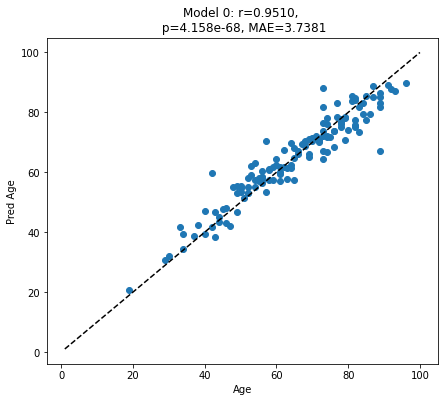

In [62]:
# make scatterplot of age v. DNAm age and plot the BLP  
regression = stats.linregress(preds.astype(float), Y_test.astype(float))
slope, intercept, rvalue, pvalue, stderr = regression
pred = slope * preds + intercept

plt.figure(figsize=(7, 6))
plt.scatter(Y_test, preds)
plt.plot(np.linspace(1, 100, 100), np.linspace(1, 100, 100), 'k--')

plt.xlabel('Age')
plt.ylabel('Pred Age')
mae = metrics.mean_absolute_error(preds, Y_test)



plt.title('Model 0: r={:.4f}, \n p={:.4g}, MAE={:.4f}'.format(rvalue, pvalue, mae))

# plot R^2 values by Rank: Figure 3B - Part 1

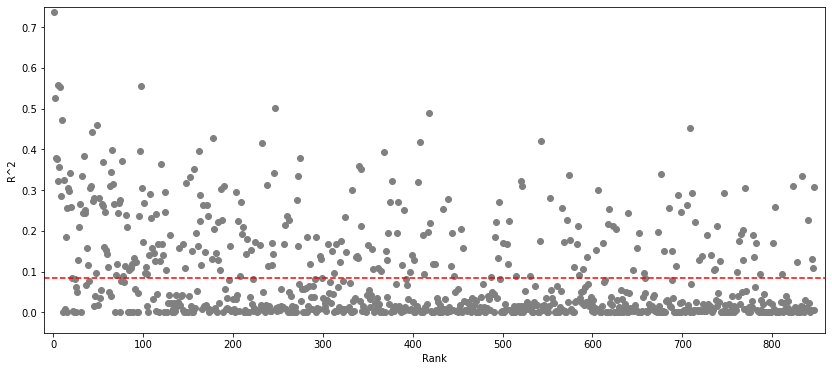

In [92]:
plt.figure(figsize=(14, 6))
plt.scatter(coeff_test_df0["Rank"].to_list(), coeff_test_df0["Rvalue"].to_list(), color = "grey")
plt.xlim(-10, 859)
plt.ylim(-0.05, 0.75)
plt.xlabel('Rank')
plt.ylabel('R^2')
plt.axhline(coeff_test_df0["Rvalue"].mean(), linestyle='--', color = "red")

In [35]:
#Find the lowest R^2 CpGs in the top 50 weighted Clock CpGs in model0
lowsest =coeff_test_df0.head(50).reindex(coeff_test_df0.head(50).Rvalue.abs().sort_values(ascending=True).index)
lowsest

,Magnitude,CpG,Rank,Rvalue
171187,0.243693,cg09149147,11,0.000032
126084,0.230016,cg06648759,16,0.000423
414087,-0.205071,cg24172553,25,0.001003
234348,-0.189187,cg13012691,31,0.002098
179977,-0.214266,cg09662325,23,0.002113
451177,-0.215054,cg26539321,22,0.003352
338133,0.233050,cg19211077,13,0.007941
420293,0.160558,cg24583287,45,0.016786
139175,0.153516,cg07321032,50,0.019114
359484,0.159109,cg20592391,47,0.040360


## Then we move on to plot the methylation behavior of the lowest R^2 CpG in the top 50 weighted clock CpGs of model0

In [ ]:
#Create a Table of Betas for the lowest R^2 CpG in the top 50 weighted Clock CpGs in model0
lowsest_Betas = hannum_test.T.iloc[lowsest.index[0]]

Text(0.5, 1.0, 'model 0 - cg09149147:\n The 11th highest weighted clock CpG \n r=-0.0057, \n p=0.8842')

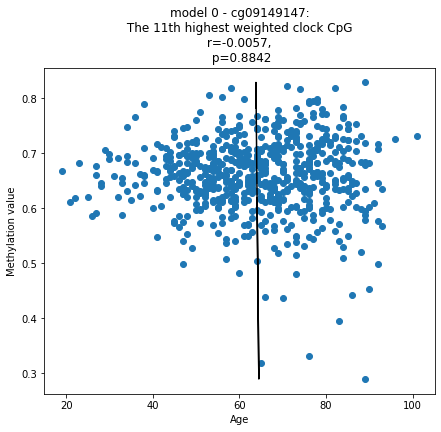

In [57]:
# make scatterplot of age v. OLS age prediction and plot the BLP  
cpg = hannum_test.T.iloc[lowsest.index[0]].astype(float)
regression = stats.linregress(cpg, ages.Age.astype(float))
slope, intercept, rvalue, pvalue, stderr = regression
pred = slope *cpg   + intercept

plt.figure(figsize=(7, 6))
plt.scatter(ages.Age.astype(float), cpg)
plt.plot(pred,cpg, 'k')

plt.xlabel('Age')
plt.ylabel('Methylation value')


plt.title("model 0 - cg09149147:\n The 11th highest weighted clock CpG \n r={:.4f}, \n p={:.4g}".format(rvalue, pvalue))

# Now create Model1 by removing clock CpGs from the dataset and retraining

In [13]:
#create the dataset without model0 clocks
hannum_test_1 = hannum_test.drop(coeff_test_df0["CpG"].to_list(), axis=1)

hannum_test_1

CpG,cg00000029,cg00000108,cg00000109,cg00000165,cg00000236,cg00000289,cg00000292,cg00000321,cg00000363,cg00000622,...,ch.9.945770F,ch.9.96055087R,ch.9.97139671F,ch.9.98463211R,ch.9.98936572R,ch.9.98937537R,ch.9.98957343R,ch.9.98959675F,ch.9.98989607R,ch.9.991104F
GSM989827,0.464197,0.941091,0.911182,0.132014,0.717861,0.686521,0.805003,0.228244,0.338483,0.016508,...,0.022659,0.109918,0.061222,0.034284,0.133692,0.042808,0.052589,0.035624,0.028066,0.043850
GSM989828,0.454883,0.939033,0.596455,0.206917,0.723935,0.619084,0.814672,0.310879,0.418998,0.005747,...,0.005095,0.076996,0.052640,0.027978,0.125270,0.036811,0.053343,0.075618,0.017428,0.032950
GSM989829,0.485764,0.918802,0.870333,0.162861,0.719196,0.635678,0.824336,0.263215,0.424736,0.012197,...,0.021444,0.070694,0.058888,0.032643,0.139105,0.042844,0.045973,0.126421,0.021752,0.022375
GSM989830,0.480785,0.929908,0.889689,0.197780,0.704061,0.610864,0.811152,0.316761,0.398772,0.019945,...,0.028587,0.094749,0.056279,0.036997,0.140601,0.042258,0.048733,0.084051,0.027504,0.053007
GSM989831,0.501220,0.934548,0.890450,0.148437,0.754913,0.651262,0.808628,0.338289,0.366965,0.000000,...,0.018626,0.110543,0.057568,0.036746,0.129993,0.039613,0.039254,0.165874,0.020889,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM990623,0.527496,0.958173,0.922034,0.223068,0.778959,0.709248,0.825768,0.354296,0.396241,0.001778,...,0.016319,0.079741,0.072076,0.052052,0.159212,0.049571,0.033060,0.093414,0.013654,0.014088
GSM990624,0.588331,0.982450,0.855145,0.162180,0.796868,0.535832,0.806713,0.295598,0.301319,0.006685,...,0.023837,0.117762,0.058466,0.037199,0.133899,0.055904,0.062442,0.101100,0.014193,0.000000
GSM990625,0.362994,0.954392,0.927184,0.196430,0.713020,0.664184,0.804045,0.395724,0.445179,0.003822,...,0.012054,0.079249,0.053499,0.050002,0.149589,0.048526,0.041087,0.049857,0.016840,0.041415
GSM990626,0.499145,0.931690,0.900938,0.167477,0.730215,0.665792,0.831365,0.338117,0.383953,0.000000,...,0.009878,0.090751,0.060335,0.040898,0.168269,0.056429,0.047835,0.028896,0.025346,0.052959


In [15]:
#Save the Dataset 
hannum_test_1.to_pickle(parent + '/MethylAndAges/hannum sig removed.pkl')

In [ ]:
#load in the dataset
hannum_test_1 = pd.read_pickle(parent + '/MethylAndAges/hannum sig removed.pkl')

In [60]:
#Split the dataset into training and test subsets 
from sklearn.model_selection import train_test_split
methyl_raw_train, methyl_raw_test, age_train, age_test = train_test_split(hannum_test_1, ages, test_size=0.2, random_state=42)


In [61]:
#Read in age training data as a list
Y_train=age_train.values.ravel()

In [62]:
#Scale our data such that the fit is to the training set
scaler = StandardScaler().fit(methyl_raw_train)
methyl_train = scaler.transform(methyl_raw_train)

methyl_test = scaler.transform(methyl_raw_test)

In [ ]:
#Create Elastic Net model
elastic_netCV_1 = ElasticNetCV(l1_ratio = 0.5, n_alphas = 50, cv = 10, n_jobs=11, random_state = 42,
                             max_iter=5000, tol = 0.001, selection='cyclic')

In [ ]:
#Train the model. 
elastic_netCV_1.fit(methyl_train,Y_train)

In [ ]:
#Save the Elastic Net model
dump(elastic_netCV_1, parent + '/Trained_Models/elastic_netCV_Hannum_Remove_sig.joblib')

In [16]:
#load in the elastic net model
elastic_netCV_1 = load(parent + '/Trained_Models/elastic_netCV_Hannum_Remove_sig.joblib')

/Users/connorluellen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator ElasticNetCV from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


# plot R^2 values by Rank: Figure 3A - Part 2

In [63]:
#Make predictions on test set data

Y_test=age_test.values.ravel()
preds = elastic_netCV_1.predict(methyl_test)

In [64]:
#Calculate the r and MAE for the test set 
sum = 0 
for sample in range(len(Y_test)):
    sum = sum + abs(preds[sample]-Y_test[sample])
    
mae = sum/len(Y_test)
print(mae)

my_rho = np.corrcoef(preds, Y_test.astype(float))
print(my_rho[0][1])

4.619442586782214
0.945586593227881


Text(0.5, 1.0, ' Model 1: r=0.9456, \n p=3.001e-65, MAE=4.6194')

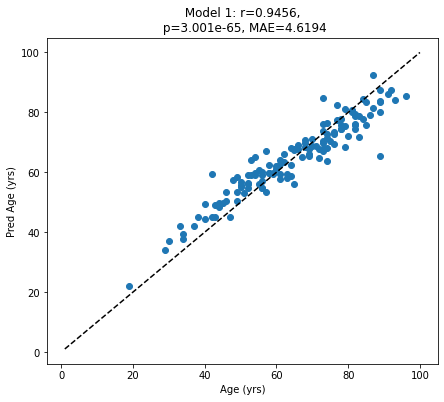

In [65]:
# make scatterplot of age v. DNAm age and plot the BLP  
regression = stats.linregress(preds.astype(float), Y_test.astype(float))
slope, intercept, rvalue, pvalue, stderr = regression
pred = slope * preds + intercept

plt.figure(figsize=(7, 6))
plt.scatter(Y_test, preds)
plt.plot(np.linspace(1, 100, 100), np.linspace(1, 100, 100), 'k--')
#plt.axline((1, 1), slope=1)

plt.xlabel('Age (yrs)')
plt.ylabel('Pred Age (yrs)')
mae = metrics.mean_absolute_error(preds, Y_test)


plt.title(' Model 1: r={:.4f}, \n p={:.4g}, MAE={:.4f}'.format(rvalue, pvalue, mae))

# plot R^2 values by Rank: Figure 3B - Part 2

In [17]:
#Get the non-zero coefficients of significant cpgs. 
coeffs_1 = pd.DataFrame(elastic_netCV_1.coef_)
coeffs_1 = coeffs_1[(coeffs_1.T != 0).any()]
coeffs_1 = coeffs_1.rename(columns={coeffs_1.columns[0]: 'Magnitude'})
coeffs_1

,Magnitude
463,0.003417
705,-0.011796
942,-0.031027
1370,0.050230
2157,0.070267
...,...
466274,-0.014981
467162,-0.040981
467692,0.015845
468958,0.064395


In [18]:
#Get significant CpGs and their indices
colnames = pd.DataFrame(hannum_test_1.columns)
sig_cpgs_1 = colnames.iloc[coeffs_1.index]
sig_cpgs_1

,CpG
463,cg00019759
705,cg00029246
942,cg00039326
1370,cg00059225
2157,cg00094518
...,...
466274,cg27492942
467162,cg27544190
467692,cg27574595
468958,cg27652459


In [19]:
#Generate a table which ranks all 849 Clock Cpgs from highest absolute model weight to lowest
coeff_test_1 = coeffs_1.reindex(coeffs_1.Magnitude.abs().sort_values(ascending=False).index)
coeff_test_1["CpG"] = colnames.iloc[coeff_test_1.index]
coeff_test_1["Rank"] = [i for i in range(1,len(coeff_test_1.index)+1)]
coeff_test_1.head(100)

,Magnitude,CpG,Rank
383769,0.481521,cg22285878,1
402559,0.392731,cg23500537,2
6765,-0.338910,cg00329615,3
285062,-0.267520,cg15903032,4
354243,0.256374,cg20273670,5
...,...,...,...
394571,-0.092373,cg23008153,96
219649,-0.091946,cg12079303,97
198393,0.090332,cg10778288,98
26082,0.090245,cg01287975,99


In [21]:
#Find the linearity, represented by the rvalue of a linear regression, of each CpG with Age, then add this to 
# a new table, which includes the values from our previous table

r_values =[]

coeff_test_df1 = coeff_test_1.copy() 
for item in coeff_test_1.index:
    cpg = hannum_test_1.T.iloc[item].astype(float)
    regression = stats.linregress(cpg, ages_h.Age.astype(float))
    slope, intercept, rvalue, pvalue, stderr = regression
    r_values.append(rvalue**2)
    

coeff_test_df1["Rvalue"] = r_values
coeff_test_df1

,Magnitude,CpG,Rank,Rvalue
383769,0.481521,cg22285878,1,0.351004
402559,0.392731,cg23500537,2,0.384802
6765,-0.338910,cg00329615,3,0.301820
285062,-0.267520,cg15903032,4,0.240795
354243,0.256374,cg20273670,5,0.337256
...,...,...,...,...
70387,0.000636,cg03584544,448,0.055837
182021,0.000482,cg09809932,449,0.089865
266321,0.000335,cg14710984,450,0.024217
269462,0.000287,cg14906510,451,0.078226


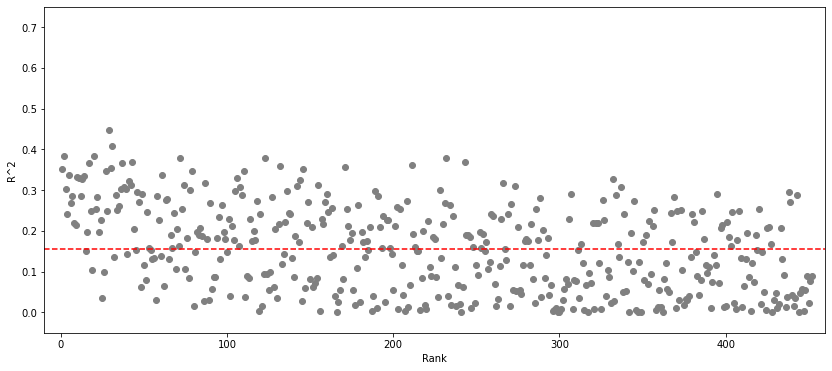

In [22]:
plt.figure(figsize=(14, 6))
plt.scatter(coeff_test_df1["Rank"].to_list(), coeff_test_df1["Rvalue"].to_list(), color = "grey")
plt.xlim(-10, 460)
plt.ylim(-0.05, 0.75)
plt.xlabel('Rank')
plt.ylabel('R^2')
plt.axhline(coeff_test_df1["Rvalue"].mean(), linestyle='--',  color = "red")

In [77]:
#find highest R^2 CpG in the top 50 weighted Clock CpGs in model1
highest =coeff_test_df1.head(50).reindex(coeff_test_df1.head(50).Rvalue.abs().sort_values(ascending=False).index)
highest

,Magnitude,CpG,Rank,Rvalue
155189,-0.163732,cg08234504,29,0.447005
406500,-0.155920,cg23744638,31,0.408994
402559,0.392731,cg23500537,2,0.384802
395840,-0.182366,cg23078123,20,0.384459
34984,0.141062,cg01763090,43,0.368511
5970,0.187639,cg00292135,17,0.366989
36240,-0.147135,cg01820374,37,0.365349
443981,0.157925,cg26161329,30,0.353940
383769,0.481521,cg22285878,1,0.351004
143604,-0.166735,cg07583137,27,0.346360


## Then we move on to plot the methylation behavior of the highest R^2 CpG in the top 50 weighted clock CpGs of model1

In [78]:
#Create a Table of Betas for the highest R^2 CpG in the top 50 weighted Clock CpGs in model1
highest_Betas = hannum_test_1.T.iloc[highest.index[0]]

highest_Betas

GSM989827    0.296420
GSM989828    0.221986
GSM989829    0.269356
GSM989830    0.282706
GSM989831    0.268103
               ...   
GSM990623    0.286531
GSM990624    0.266158
GSM990625    0.268304
GSM990626    0.295968
GSM990627    0.243351
Name: cg08234504, Length: 656, dtype: float64

Text(0.5, 1.0, 'model 1 - cg08234504:\n The 29thth highest weighted clock CpG \n r=-0.6686, \n p=3.449e-86')

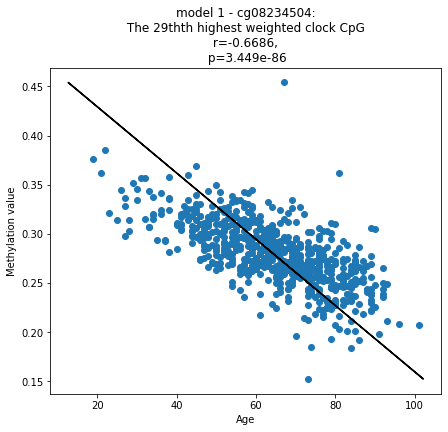

In [79]:
# make scatterplot of age v. OLS age prediction and plot the BLP for the highest R^2 CpG in the top 50 weighted Clock CpGs in model1
cpg = hannum_test_1.T.iloc[highest.index[0]].astype(float)
regression = stats.linregress(cpg, ages.Age.astype(float))
slope, intercept, rvalue, pvalue, stderr = regression
pred = slope *cpg   + intercept

plt.figure(figsize=(7, 6))
plt.scatter(ages.Age.astype(float), cpg)
plt.plot(pred,cpg, 'k')

plt.xlabel('Age')
plt.ylabel('Methylation value')


plt.title("model 1 - cg08234504:\n The 29thth highest weighted clock CpG \n r={:.4f}, \n p={:.4g}".format(rvalue, pvalue))

# Find R^2s
Here we find the R^2 of each CpG in the dataset, then we train successive liniear reggrsions of CpG methylyzation vs age by pairwase adding the CpGs in order by R^2 rank. Then the MAE and pearsons R of these liniear regressions are found for model 0

In [13]:
#generate a list of all CpG names
All_CpGs = pd.DataFrame(hannum_test.columns)
All_CpGs.rename(columns={All_CpGs.columns[0]: 'CpG'})
All_CpGs

,CpG
0,cg00000029
1,cg00000108
2,cg00000109
3,cg00000165
4,cg00000236
...,...
473029,ch.9.98937537R
473030,ch.9.98957343R
473031,ch.9.98959675F
473032,ch.9.98989607R


In [14]:
#Find the linearity, represented by the rvalue of a linear regression, of each CpG with Age, then add this to 
# a new table, which includes the values from our previous table

r_values =[]
i = 0

CpG_Stats = All_CpGs.copy() 
for item in All_CpGs.index:
    cpg = hannum_test.T.iloc[item].astype(float)
    regression = stats.linregress(cpg, ages.Age.astype(float))
    slope, intercept, rvalue, pvalue, stderr = regression
    r_values.append(rvalue**2)
    i = i+1
    if i % 100 == 0:
        print(i)

CpG_Stats["Rvalue"] = r_values
CpG_Stats

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

,CpG,Rvalue
0,cg00000029,0.043980
1,cg00000108,0.002960
2,cg00000109,0.001722
3,cg00000165,0.007334
4,cg00000236,0.002814
...,...,...
473029,ch.9.98937537R,0.019479
473030,ch.9.98957343R,0.019157
473031,ch.9.98959675F,0.011320
473032,ch.9.98989607R,0.002129


In [15]:
#save the R^2 value of each CpG
CpG_Stats.to_pickle(parent + '/CpG_Rs/CpG_R.pkl')

In [28]:
#Load in each CpGs R^2 value
CpG_Stats = pd.read_pickle(parent + '/CpG_Rs/CpG_R.pkl')

In [29]:
# reorganize this table from highest to lowest R^2. 
CpG_Stats = CpG_Stats.reindex(CpG_Stats.Rvalue.abs().sort_values(ascending=False).index)
CpG_Stats["Rank"] = [i for i in range(1,len(CpG_Stats.index)+1)]
CpG_Stats

,CpG,Rvalue,Rank
301866,cg16867657,7.370845e-01,1
125881,cg06639320,5.581623e-01,2
422693,cg24724428,5.543984e-01,3
386707,cg22454769,5.535276e-01,4
194163,cg10501210,5.271277e-01,5
...,...,...,...
277515,cg15399533,5.035264e-13,473030
68697,cg03495084,3.727660e-13,473031
400876,cg23342777,1.205397e-13,473032
362724,cg20795372,1.170627e-13,473033


# Now load the Arthritis dataset and find Rs across the dataset

In [ ]:
#load in the arthritis dataset
arth = pd.read_pickle(parent + '/MethylAndAges/arth raw.pkl')
arth

In [ ]:
#Transpose our data such that each row is a GSM. 
arth_test = arth.T
arth_test.columns.name = "CpG"
arth_test 

In [ ]:
#Load in the ages of our arthritis dataset
ages_a = pd.read_pickle(parent + '/MethylAndAges/arth ages.pkl')
ages_a = ages_a.rename(columns={ages_a.columns[0]: 'Age'})
ages_a

In [56]:
#generate a list of all CpG names
All_CpGs = pd.DataFrame(arth_test.columns)
All_CpGs.rename(columns={All_CpGs.columns[0]: 'CpG'})
All_CpGs

,CpG
0,cg00000029
1,cg00000108
2,cg00000109
3,cg00000165
4,cg00000236
...,...
485572,rs9363764
485573,rs939290
485574,rs951295
485575,rs966367


In [58]:
#Find the linearity, represented by the rvalue of a linear regression, of each CpG with Age, then add this to 
# a new table, which includes the values from our previous table

r_values =[]
i = 0

Arth_allR = All_CpGs.copy() 
for item in All_CpGs.index:
    cpg = arth_test.T.iloc[item].astype(float)
    regression = stats.linregress(cpg, ages_a.Age.astype(float))
    slope, intercept, rvalue, pvalue, stderr = regression
    r_values.append(rvalue**2)
    i = i+1
    if i % 100 == 0:
        print(i)

Arth_allR["Rvalue"] = r_values
Arth_allR

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

,CpG,Rvalue
0,cg00000029,0.019046
1,cg00000108,0.001503
2,cg00000109,0.000025
3,cg00000165,0.009955
4,cg00000236,0.000068
...,...,...
485572,rs9363764,0.000262
485573,rs939290,0.002486
485574,rs951295,0.000003
485575,rs966367,0.000103


In [59]:
#save the R^2 value of each CpG
Arth_allR.to_pickle(parent + '/CpG_Rs/Arth_allR.pkl')